# Machine learning model for weather prediction 

This is an Attempt to make a working ML MODEL. BASIC ML MODEL.
We will be going step by step and see how to make a model.
Lets build a simple weather prediction model. We will use SVM.

Dataset: We will generate a synthetic Dataset.csv file. This will help us to train and use the ML Model.

First, lets understand our problem statement.
ML MODEL FOR predicting Weather. Will it rain tomorrow? yes or no (1 or 0)
what are the parameters we are considering? 
1. Temperature
2. Season
3. humidity
4. Does it look cloudy or not.
5. Windspeed.

Lets generate a Dataset using o1 now.

Temperature,Season,Humidity,Cloudy,Windspeed,Rain
28,Summer,65,1,15,0
31,Summer,60,0,10,0
24,Monsoon,85,1,20,1
22,Monsoon,90,1,25,1
26,Post-Monsoon,75,1,15,1
20,Winter,70,0,5,0
25,Summer,60,0,10,0
23,Monsoon,80,1,20,1
21,Monsoon,88,1,15,1
27,Post-Monsoon,70,0,10,0
19,Winter,65,0,5,0
29,Summer,55,0,15,0
24,Monsoon,82,1,20,1
19,Winter,68,1,5,0
26,Post-Monsoon,65,1,10,1

Now lets import some libraries

In [1]:
import pandas as pd #Pandas is for Data processing. 
import matplotlib.pyplot as plt #plotting and visually understanding the data.
from sklearn.model_selection import train_test_split #split the data into testing and training set
from sklearn.preprocessing import LabelEncoder #converts things like "monsoon", "summer" into numeric labels like 0 1 2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # SUPPORT VECTOR CLASSIFIER
from sklearn.metrics import classification_report #Performance evaluation
from sklearn.preprocessing import MinMaxScaler


What next?
-Load and prepare the dataset using pandas.
-Visualize the data with matplotlib to get an understanding of patterns.
-Preprocess the data: Use LabelEncoder or One-Hot Encoding for categorical variables.Scale numerical data using MinMaxScaler.
-Split the dataset into training and testing using train_test_split.
-Train the model using either Logistic Regression or SVM.
-Evaluate the model using classification_report to assess its performance.

now lets understand the Dataset.


In [2]:
df = pd.read_csv("dataset.csv")
display(df)


,Temperature,Season,Humidity,Cloudy,Windspeed,Rain
0,28,Summer,65,1,15,0
1,31,Summer,60,0,10,0
2,24,Monsoon,85,1,20,1
3,22,Monsoon,90,1,25,1
4,26,Post-Monsoon,75,1,15,1
5,20,Winter,70,0,5,0
6,25,Summer,60,0,10,0
7,23,Monsoon,80,1,20,1
8,21,Monsoon,88,1,15,1
9,27,Post-Monsoon,70,0,10,0


But i thought i wanted to make Summer monsoon, post monsoon and winter into numeric labels?


In [3]:
encoder = LabelEncoder()
df['Season'] = encoder.fit_transform(df['Season'])

In [4]:
display(df)

,Temperature,Season,Humidity,Cloudy,Windspeed,Rain
0,28,2,65,1,15,0
1,31,2,60,0,10,0
2,24,0,85,1,20,1
3,22,0,90,1,25,1
4,26,1,75,1,15,1
5,20,3,70,0,5,0
6,25,2,60,0,10,0
7,23,0,80,1,20,1
8,21,0,88,1,15,1
9,27,1,70,0,10,0


OK so now, we have converted The labels to numerical.
Now lets plot the graph
rain vs other factors.

In [ ]:
X = df[['Temperature','Season','Humidity','Cloudy','Windspeed']]
Y = df['Rain']

plt.scatter(X, Y)

 In your dataset, the Season column contains categorical data, such as 'Summer', 'Monsoon', etc. Matplotlib doesn’t automatically know how to handle such data in a plot, because it’s designed to work with numbers for plotting the axes (like coordinates on a graph).

Matplotlib needs numbers to plot things on a graph. So, when you try to plot X (which includes categorical data like 'Summer', 'Monsoon', etc.) against Y (the target variable Rain), it doesn’t know how to convert the text values into something it can plot.
instead, lets use Seaborn's plotting thing


but wait, we didnt normalise the data yet. 

In [5]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the relevant columns
df[['Temperature', 'Humidity', 'Windspeed']] = scaler.fit_transform(df[['Temperature', 'Humidity', 'Windspeed']])

# Check the normalized data
print(df[['Temperature', 'Humidity', 'Windspeed']].head())

df.to_csv("datasetn.csv")


   Temperature  Humidity  Windspeed
0     0.750000  0.285714       0.50
1     1.000000  0.142857       0.25
2     0.416667  0.857143       0.75
3     0.250000  1.000000       1.00
4     0.583333  0.571429       0.50


Now lets try plotting using matplotlib


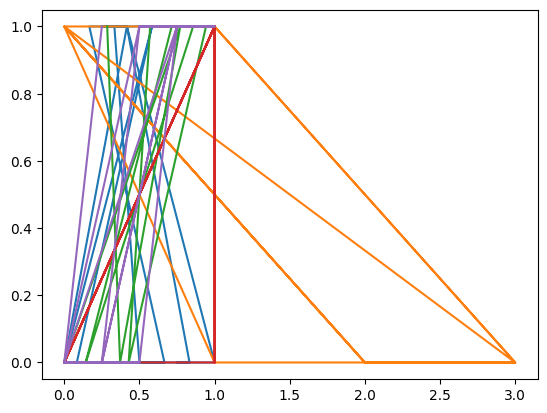

In [6]:
X = df[['Temperature','Season','Humidity','Cloudy','Windspeed']]
Y = df['Rain']

plt.plot(X, Y)

I genuinely don't think this is how it is supposed to look like.


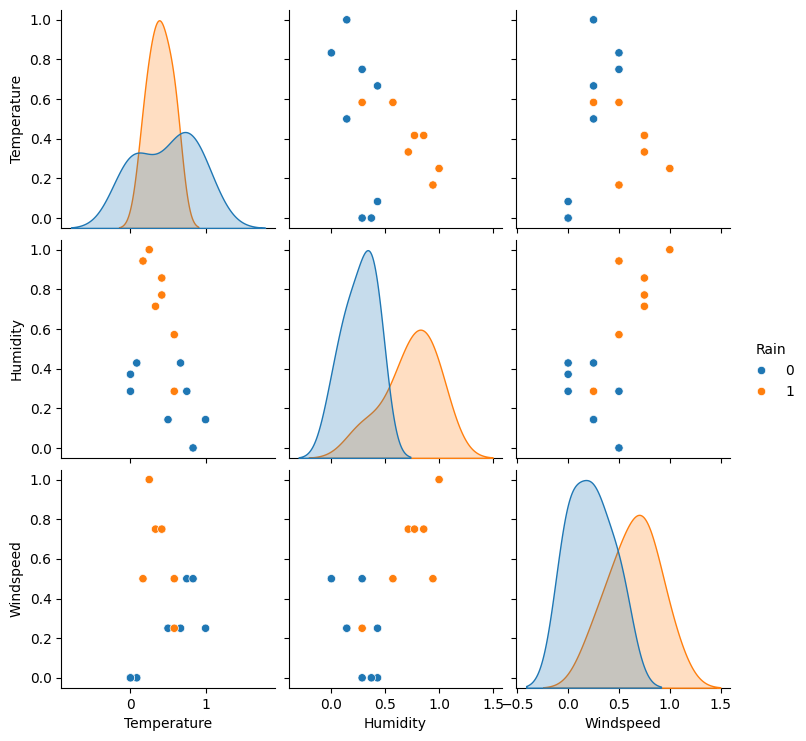

In [7]:
import seaborn as sns
sns.pairplot(df, hue='Rain', vars=['Temperature', 'Humidity', 'Windspeed'])
plt.show()

Now lets split the data into training and testing Data

In [8]:
X = df[['Temperature', 'Humidity', 'Windspeed']]
Y = df['Rain']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#test_size is for splitting. basically 0.2 means 20% of data will be used for testing.

 NOW LETS TRAIN THE MODEL

In [9]:
model = SVC()
model.fit(X_train,Y_train)

SVC()

 prediction
basically, output lol

In [10]:
predict = model.predict(X_test)
print(X_test)
print(predict)

    Temperature  Humidity  Windspeed
9      0.666667  0.428571       0.25
11     0.833333  0.000000       0.50
0      0.750000  0.285714       0.50
[1 0 1]


this means, it took these inputs for the model testing, and then the list is the output.

Lets try giving in our own parameters.


In [43]:
temp = float(input("Enter the temperature: "))
hum = float(input("Humidity? "))
wind = float(input("Wind "))

user = [(temp, hum, wind)]
print(model.predict(user))

[1]


C:\Users\satya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


GREAT! We have actually made an ML model ready. Before we dip, lets get its Classification Report

In [44]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



C:\Users\satya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: Unde